# Handling Missing Values: Comprehensive Notebook

This Python notebook provides an in-depth exploration of techniques to handle missing data, a crucial aspect of data preprocessing in machine learning and data analysis. By the end of this notebook, you will:
- Understand the importance of addressing missing values.
- Learn various techniques to visualize and handle missing data.
- Gain hands-on experience with real-world examples.

Let's dive in!

In [1]:
import matplotlib.pyplot as plt
import numpy as np
# Step 1: Importing necessary libraries
import pandas as pd
import seaborn as sns
from sklearn.impute import SimpleImputer, KNNImputer

# Ensure plots are displayed inline in Jupyter Notebooks
%matplotlib inline

In [2]:
# Step 2: Setting up a sample dataset with missing values
np.random.seed(42)
data = pd.DataFrame({
    'Feature_1': np.random.choice([1, 2, np.nan], size=100, p=[0.45, 0.45, 0.1]),
    'Feature_2': np.random.choice([3, 4, np.nan], size=100, p=[0.76, 0.20, 0.04]),
    'Feature_3': np.random.choice([5, np.nan], size=100, p=[0.2, 0.8]),
    'Feature_4': np.random.choice(['A', 'B', " "], size=100, p=[0.3, 0.61, 0.09])
})

# Display the first few rows of the dataset
data.head()

,Feature_1,Feature_2,Feature_3,Feature_4
0,1.0,3.0,NaN,A
1,NaN,3.0,5.0,B
2,2.0,3.0,5.0,B
3,2.0,3.0,NaN,B
4,1.0,4.0,NaN,B


# Section 1: Visualizing Missing Data

Before handling missing data, it's essential to understand its extent and distribution. Visualization tools help us quickly identify patterns and the magnitude of missing values in the dataset.

In [3]:
print("Dataset Preview:")
print(data.head())
print("len: ", len(data))

Dataset Preview:
   Feature_1  Feature_2  Feature_3 Feature_4
0        1.0        3.0        NaN         A
1        NaN        3.0        5.0         B
2        2.0        3.0        5.0         B
3        2.0        3.0        NaN         B
4        1.0        4.0        NaN         B
len:  100


In [4]:
# count the null values in each feature
print(data.isnull().sum())

print("\nBe careful with categorical variables!")
data = data.replace(" ", np.nan)
print(data.isnull().sum())

Feature_1     9
Feature_2     3
Feature_3    80
Feature_4     0
dtype: int64

Be careful with categorical variables!
Feature_1     9
Feature_2     3
Feature_3    80
Feature_4     8
dtype: int64


In [5]:
feature_1_count = (data['Feature_1'].isnull().sum() / len(data)) * 100
print("Percentage of null values in the first feature: ", feature_1_count, "%")

feature_2_count = (data['Feature_2'].isnull().sum() / len(data)) * 100
print("Percentage of null values in the second feature: ", feature_2_count, "%")

feature_3_count = (data['Feature_3'].isnull().sum() / len(data)) * 100
print("Percentage of null values in the third feature: ", feature_3_count, "%")

feature_4_count = (data['Feature_4'].isnull().sum() / len(data)) * 100
print("Percentage of null values in the fourth feature: ", feature_4_count, "%")

Percentage of null values in the first feature:  9.0 %
Percentage of null values in the second feature:  3.0 %
Percentage of null values in the third feature:  80.0 %
Percentage of null values in the fourth feature:  8.0 %


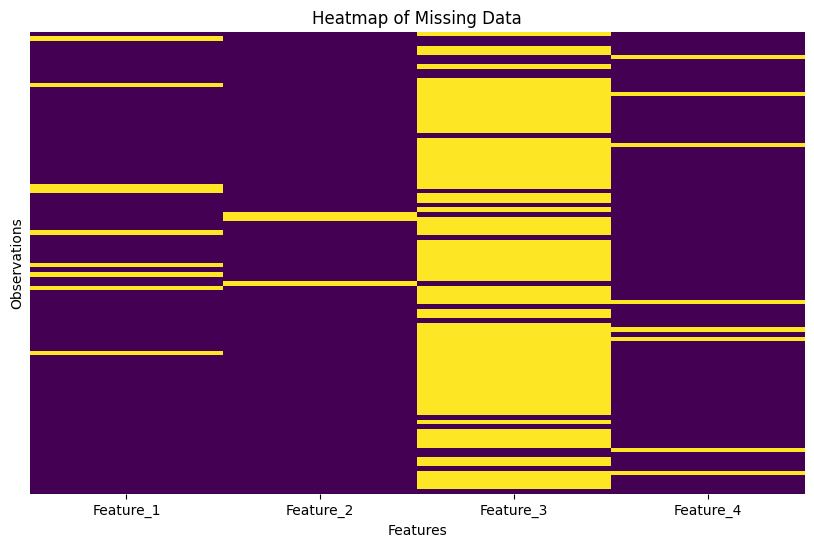

In [6]:
plt.figure(figsize=(10, 6))
sns.heatmap(data.isnull(), cbar=False, cmap='viridis', yticklabels=False)
plt.title("Heatmap of Missing Data")
plt.xlabel("Features")
plt.ylabel("Observations")
plt.show()  # yellow indicates a missing value

# Section 2: Handling Missing Data

Handling missing data involves selecting appropriate strategies based on the nature of the data and the problem at hand. Below, we'll explore common methods such as:
- **Deletion:** Removing rows or columns with missing values.
- **Imputation:** Filling in missing values using statistical or machine learning methods.

Each feature in our dataset will be analyzed individually for tailored handling.

## Feature_1: Row-wise Deletion vs. Mean Imputation

*Feature_1* contains a small number of null values, which can be addressed by either **removing the rows with missing data** or **imputing the missing values** using an appropriate strategy (mean, median for numerical variables).

One common method is mean imputation, where the missing values are replaced with the average of the observed values in the feature. This approach is simple and fast, but it may not always be the best choice if the data has outliers or is highly skewed, as it can distort the distribution of the feature.

In [7]:
# Row-wise deletion
example_data_1 = data.copy()
example_data_1 = example_data_1.dropna(subset=['Feature_1'])

print("\nAfter Row Deletion:")
print(example_data_1['Feature_1'].describe())


After Row Deletion:
count    91.000000
mean      1.461538
std       0.501280
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Feature_1, dtype: float64


In [8]:
# Mean Imputation
example_data_1_mean = data.copy()
mean_imputer = SimpleImputer(strategy='mean')
example_data_1_mean['Feature_1'] = mean_imputer.fit_transform(example_data_1_mean[['Feature_1']])

print("\nAfter Mean Imputation:")
print(example_data_1_mean['Feature_1'].describe())


After Mean Imputation:
count    100.000000
mean       1.461538
std        0.477952
min        1.000000
25%        1.000000
50%        1.461538
75%        2.000000
max        2.000000
Name: Feature_1, dtype: float64


In [9]:
# Simpler Median Imputation
example_data_1_median = data.copy()
median = example_data_1_median['Feature_1'].dropna().median()
example_data_1_median['Feature_1'] = example_data_1_median[['Feature_1']].fillna(median)

print("\nAfter Median Imputation:")
print(example_data_1_median['Feature_1'].describe())


After Median Imputation:
count    100.000000
mean       1.420000
std        0.496045
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Feature_1, dtype: float64


In [10]:
# Original vs Median distribution
print(data['Feature_1'].describe())
print(example_data_1_median['Feature_1'].describe())

count    91.000000
mean      1.461538
std       0.501280
min       1.000000
25%       1.000000
50%       1.000000
75%       2.000000
max       2.000000
Name: Feature_1, dtype: float64
count    100.000000
mean       1.420000
std        0.496045
min        1.000000
25%        1.000000
50%        1.000000
75%        2.000000
max        2.000000
Name: Feature_1, dtype: float64


## Feature_2: KNN Imputation

*Feature_2* contains 24% null values, making it advisable to apply **more advanced imputation techniques** to handle the missing data effectively:
- **KNN Imputation**: Leveraging the k-nearest neighbors algorithm to estimate missing values based on the similarity of other observations. This approach can capture relationships between features and may provide better estimates, especially if the categories are not uniformly distributed.

In [11]:
print("\nHandling Feature_2:")

example_data_2 = data.copy()
knn_imputer = KNNImputer(n_neighbors=3)
example_data_2['Feature_2'] = knn_imputer.fit_transform(example_data_2[['Feature_2']])

print("\nAfter KNN Imputation:")
print(example_data_2['Feature_2'].describe())


Handling Feature_2:

After KNN Imputation:
count    100.000000
mean       3.237113
std        0.420994
min        3.000000
25%        3.000000
50%        3.000000
75%        3.237113
max        4.000000
Name: Feature_2, dtype: float64


In [12]:
# Original vs Knn Imputation distribution
print(data['Feature_2'].describe())
print(example_data_2['Feature_2'].describe())

count    97.000000
mean      3.237113
std       0.427522
min       3.000000
25%       3.000000
50%       3.000000
75%       3.000000
max       4.000000
Name: Feature_2, dtype: float64
count    100.000000
mean       3.237113
std        0.420994
min        3.000000
25%        3.000000
50%        3.000000
75%        3.237113
max        4.000000
Name: Feature_2, dtype: float64


## Feature_3: Column Deletion


*Feature_3* contains 80% null values, leaving limited useful information. It is more practical to drop this feature altogether.

In [13]:
example_data_3 = data.copy()
example_data_3 = example_data_3.drop(columns=['Feature_3'])

print("\nDataset after dropping Feature_3:")
print(example_data_3.head())


Dataset after dropping Feature_3:
   Feature_1  Feature_2 Feature_4
0        1.0        3.0         A
1        NaN        3.0         B
2        2.0        3.0         B
3        2.0        3.0         B
4        1.0        4.0         B


## Feature_4: Mode Imputation

*Feature_4* is a categorical variable with approximately 9% missing values. Since the proportion of missing data is relatively small, it can be efficiently imputed using straightforward methods. Two commonly used approaches are:
- **Mode Imputation**: Replacing missing values with the most frequently occurring category in the data. This method is simple and effective for categorical features with a small proportion of missing data.
- **KNN Imputation**: Leveraging the k-nearest neighbors algorithm to estimate missing values based on the similarity of other observations. This approach can capture relationships between features and may provide better estimates, especially if the categories are not uniformly distributed.

In [14]:
example_data_4 = data.copy()

# Initialize the SimpleImputer with most_frequent strategy
mode_imputer = SimpleImputer(strategy='most_frequent')

mode_imputed_feature = pd.DataFrame(mode_imputer.fit_transform(example_data_4[['Feature_4']]))
example_data_4['Feature_4'] = mode_imputed_feature

print("\nAfter Mode Imputation:")
print(example_data_4['Feature_4'].value_counts())


After Mode Imputation:
Feature_4
B    70
A    30
Name: count, dtype: int64


# Section 4: Exercises

Now that we've covered the basics, it's your turn to practice! Complete the following exercises to solidify your understanding of handling missing data.

Features with missing values:
 age            177
embarked         2
deck           688
embark_town      2
dtype: int64


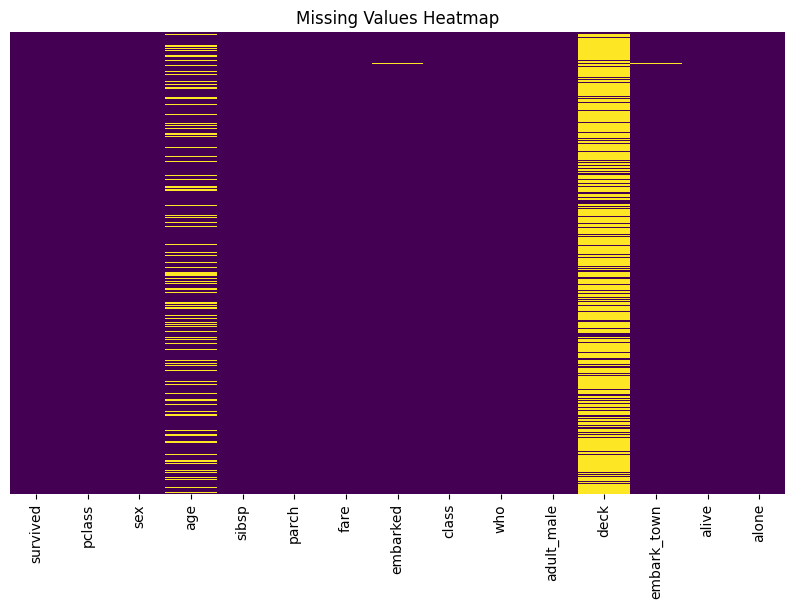

In [21]:
# Exercise 1: Check for Missing Values

# Load the titanic dataset.
# Identify which features contain missing values and determine how many missing values each feature has.
# Visualize the missing values using a heatmap.

import seaborn as sns
import pandas as pd

# Load the Titanic dataset
titanic = sns.load_dataset("titanic")

# Identify missing values
missing_values = titanic.isnull().sum()

# Print features with missing values
missing_values = missing_values[missing_values > 0]
print("Features with missing values:\n", missing_values)

# Visualize missing values using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(titanic.isnull(), cmap="viridis", cbar=False, yticklabels=False)
plt.title("Missing Values Heatmap")
plt.show()

In [22]:
# Exercise 2: Mean Imputation

# Load the titanic dataset.
# Apply mean imputation to fill the missing values in all features.
# Verify that there are no more missing values after imputation.

import pandas as pd
import seaborn as sns

# Load the Titanic dataset
titanic = sns.load_dataset("titanic")

# Identify missing values before imputation
print("Missing values before imputation:\n", titanic.isnull().sum())

# Apply mean imputation only to numeric columns
numeric_cols = titanic.select_dtypes(include=['number'])  # Select only numeric columns
titanic[numeric_cols.columns] = numeric_cols.fillna(numeric_cols.mean())

# Identify missing values after imputation
print("\nMissing values after mean imputation:\n", titanic.isnull().sum())

Missing values before imputation:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing values after mean imputation:
 survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [23]:
# Exercise 3: KNN Imputation

# Load the titanic dataset.
# Check if there are any missing values in the dataset.
# Apply KNN imputation to fill the missing values in all features.
# Verify that there are no more missing values after imputation.

import pandas as pd
import seaborn as sns
from sklearn.impute import KNNImputer

# Load the Titanic dataset
titanic = sns.load_dataset("titanic")

# Check missing values before imputation
print("Missing values before KNN imputation:\n", titanic.isnull().sum())

# Select only numeric columns for KNN imputation
numeric_cols = titanic.select_dtypes(include=['number'])
imputer = KNNImputer(n_neighbors=5)  # Using 5 nearest neighbors
titanic[numeric_cols.columns] = imputer.fit_transform(numeric_cols)

# Check missing values after imputation
print("\nMissing values after KNN imputation:\n", titanic.isnull().sum())

Missing values before KNN imputation:
 survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

Missing values after KNN imputation:
 survived         0
pclass           0
sex              0
age              0
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64


In [24]:
# Exercise 4:
# A dataset tracks students' exam scores and whether they passed the course.
# Some values are missing, but we can infer them logically:
#
# - If a student "Passed Course" (Yes), their Exam Score must be above a passing threshold.
# - If a student "Did Not Pass" (No), their Exam Score must be below the threshold.
# - If an Exam Score is given but "Passed Course" is missing, we can determine it based on the score.
#
# Tasks:
# 1. Identify which missing values can be logically inferred.
# 2. Implement a function to fill missing values using rule-based logic instead of statistics.
# 3. Handle edge cases where the rule may not be sufficient.
#
# Example dataset:
# students = [
#     {"name": "Alice", "exam_score": 85, "passed": "Yes"},
#     {"name": "Bob", "exam_score": 40, "passed": "No"},
#     {"name": "Charlie", "exam_score": None, "passed": "Yes"},
#     {"name": "David", "exam_score": 70, "passed": None},
#     {"name": "Eve", "exam_score": None, "passed": "No"}
# ]

import pandas as pd

# Example dataset
students = [
    {"name": "Alice", "exam_score": 85, "passed": "Yes"},
    {"name": "Bob", "exam_score": 40, "passed": "No"},
    {"name": "Charlie", "exam_score": None, "passed": "Yes"},
    {"name": "David", "exam_score": 70, "passed": None},
    {"name": "Eve", "exam_score": None, "passed": "No"}
]

# Convert to DataFrame
df = pd.DataFrame(students)

# Define the passing threshold
passing_threshold = 50

# Function to fill missing values logically
def fill_missing_values(row):
    if pd.isnull(row["exam_score"]) and row["passed"] == "Yes":
        row["exam_score"] = passing_threshold + 10  # Assign a safe passing score
    elif pd.isnull(row["exam_score"]) and row["passed"] == "No":
        row["exam_score"] = passing_threshold - 10  # Assign a failing score
    elif pd.isnull(row["passed"]):
        row["passed"] = "Yes" if row["exam_score"] >= passing_threshold else "No"
    return row

# Apply the function to each row
df = df.apply(fill_missing_values, axis=1)

# Print the updated dataset
print(df)

      name  exam_score passed
0    Alice        85.0    Yes
1      Bob        40.0     No
2  Charlie        60.0    Yes
3    David        70.0    Yes
4      Eve        40.0     No
